In [20]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# SteamSpy API URL
url = "https://steamspy.com/api.php?request=top100in2weeks"

# Fetch data from the API
response = requests.get(url)

# Check the response status
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully Eagle!")
else:
    pint(f"Failed to fetch data. Status Code: {response.status_code}")

Data fetched successfully Eagle!


In [24]:
# Convert JSON data into a DataFrame
df = pd.DataFrame.from_dict(data, orient="index")

# Preview the DataFrame
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1957018,439943,0,"200,000,000 .. 500,000,000",42609,1354,976,676,0,0,0,617758
730,730,Counter-Strike: Global Offensive,Valve,Valve,,7330964,1103645,0,"100,000,000 .. 200,000,000",30748,735,5591,328,0,0,0,1068973
578080,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1459032,1014160,0,"50,000,000 .. 100,000,000",22591,885,5455,369,0,0,0,393378
1623730,1623730,Palworld,Pocketpair,Pocketpair,,332446,20560,0,"50,000,000 .. 100,000,000",3087,597,1935,386,2249,2999,25,33646
1172470,1172470,Apex Legends,Respawn,Electronic Arts,,655963,314249,0,"50,000,000 .. 100,000,000",9294,643,701,180,0,0,0,83415


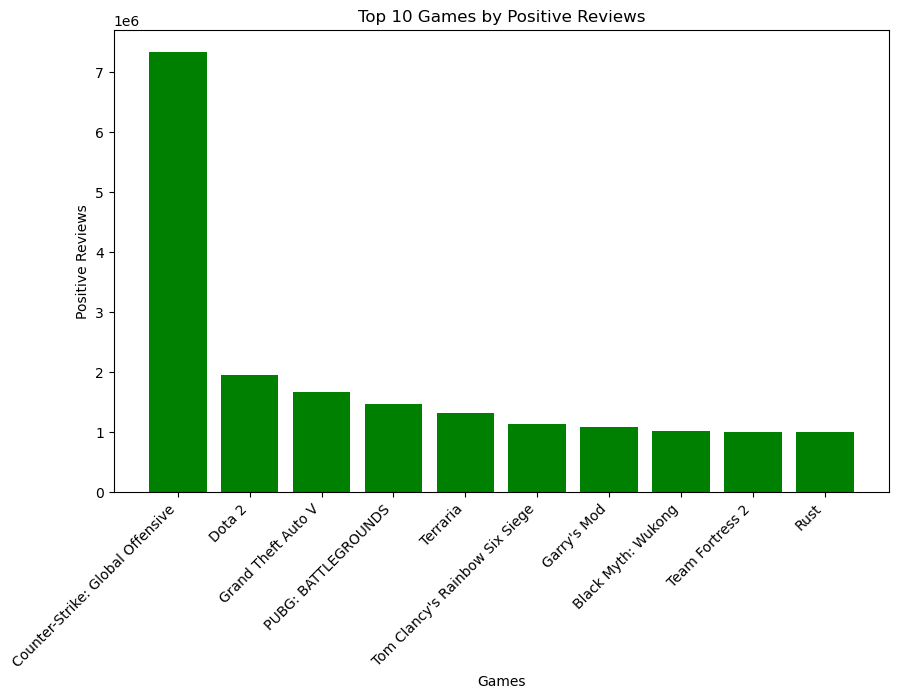

In [28]:
#Sort games by positive reviews
top_positive = df.sort_values("positive", ascending=False).head(10)

# Bar chart for positive reviews
plt.figure(figsize=(10, 6))
plt.bar(top_positive["name"], top_positive["positive"], color="green")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Games")
plt.ylabel("Positive Reviews")
plt.title("Top 10 Games by Positive Reviews")
plt.show()

In [32]:
#Add a new Column for Positive review percentage
df["positive_ratio"] = (df["positive"] / (df["positive"] + df["negative"])) * 100

# Sort by positive ratio and display the top 10
top_ratio = df.sort_values("positive_ratio", ascending=False).head(10)
print(top_ratio[["name", "positive_ratio"]])

                                  name  positive_ratio
620                           Portal 2       98.695963
413150                  Stardew Valley       98.410965
431960                Wallpaper Engine       98.036311
220                        Half-Life 2       97.592047
550                      Left 4 Dead 2       97.533249
105600                        Terraria       97.515238
250900   The Binding of Isaac: Rebirth       97.436743
10                      Counter-Strike       97.433847
227300          Euro Truck Simulator 2       97.364981
1966720                 Lethal Company       97.311023


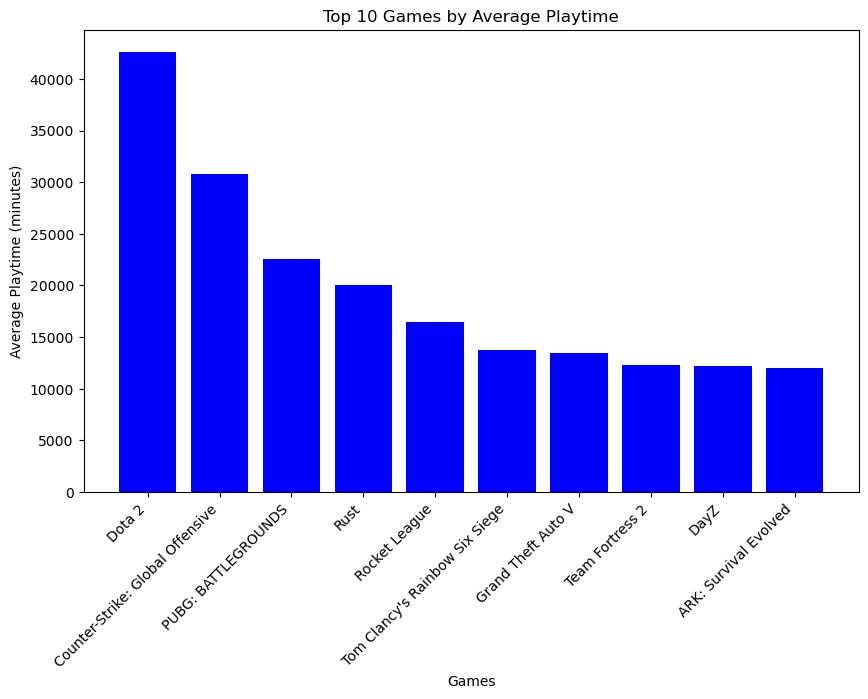

In [34]:
# Sort games by average playtime
top_playtime = df.sort_values("average_forever", ascending=False).head(10)

# Bar chart for average playtime
plt.figure(figsize=(10, 6))
plt.bar(top_playtime["name"], top_playtime["average_forever"], color="blue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Games")
plt.ylabel("Average Playtime (minutes)")
plt.title("Top 10 Games by Average Playtime")
plt.show()

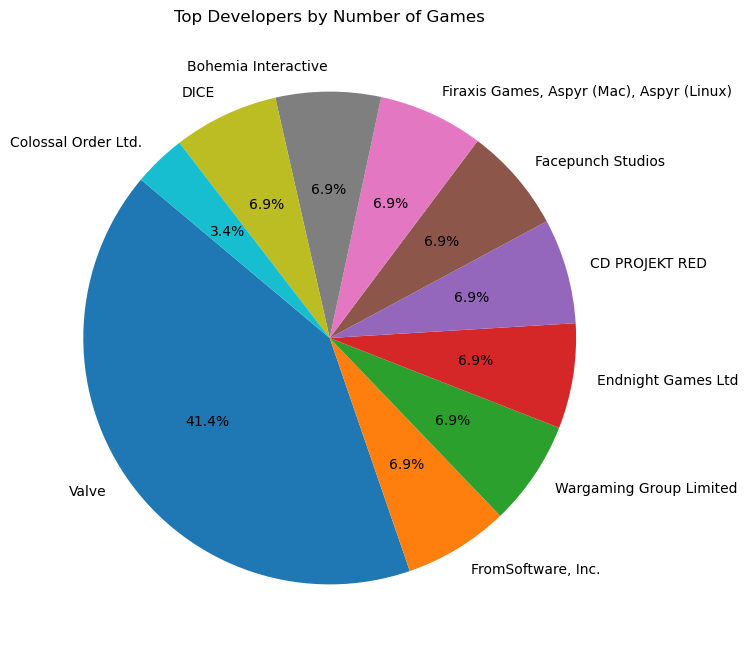

In [36]:
# Count the number of games per developer
developer_count = df["developer"].value_counts().head(10)

# Pie chart of developers
plt.figure(figsize=(8, 8))
plt.pie(developer_count, labels=developer_count.index, autopct="%1.1f%%", startangle=140)
plt.title("Top Developers by Number of Games")
plt.show()

                                     name                      owners  \
570                                Dota 2  200,000,000 .. 500,000,000   
730      Counter-Strike: Global Offensive  100,000,000 .. 200,000,000   
578080                PUBG: BATTLEGROUNDS   50,000,000 .. 100,000,000   
1623730                          Palworld   50,000,000 .. 100,000,000   
1172470                      Apex Legends   50,000,000 .. 100,000,000   

         owners_midpoint  
570                    0  
730                    0  
578080                 0  
1623730                0  
1172470                0  


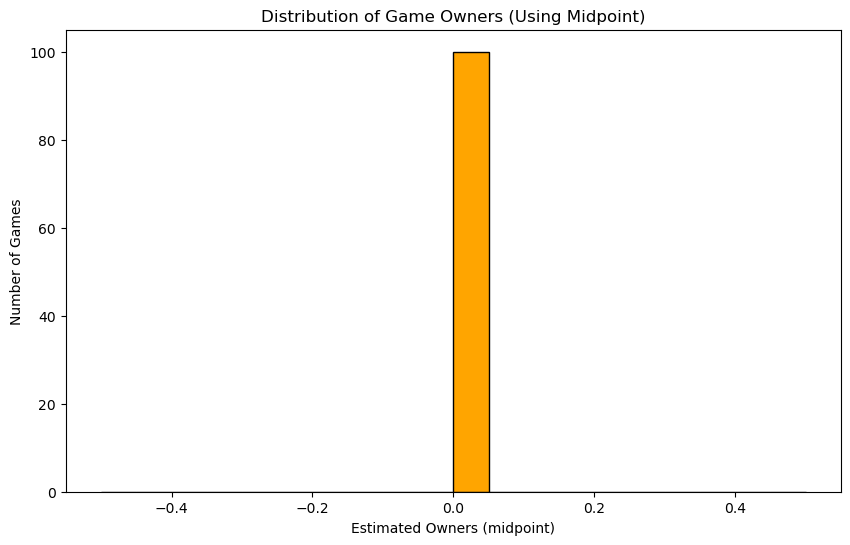

In [54]:
# Convert owners to numeric for easier handling
def calculate_owners_midpoint(value):
    try:
        lower, upper = map(lambda x: int(x.replace(",", "")), value.split("-"))
        return (lower + upper) // 2
    except Exception:
        return 0

df["owners_midpoint"] = df["owners"].apply(calculate_owners_midpoint)

print(df[["name", "owners", "owners_midpoint"]].head())

# Histogram of Owners
plt.figure(figsize=(10, 6))
plt.hist(df["owners_midpoint"], bins=20, color="orange", edgecolor="black")
plt.xlabel("Estimated Owners (midpoint)")
plt.ylabel("Number of Games")
plt.title("Distribution of Game Owners (Using Midpoint)")
plt.show()